In [7]:
import pandas
urlTraining = 'https://raw.githubusercontent.com/gbrian/machinelearning_exercises/master/ml/supervised/exercise_1/test.tsv'
urlTest = 'https://raw.githubusercontent.com/gbrian/machinelearning_exercises/master/ml/supervised/exercise_1/test.tsv'
training = pandas.read_csv(urlTraining, delimiter='\t')
testing = pandas.read_csv(urlTest, delimiter='\t')
training.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,Class
0,1,1,2,40,10,101,1,5,2,1,6,2,5
1,1,1,2,43,10,7,10,1,44,10,2,44,5
2,1,1,43,40,10,35,11,4,45,11,4,45,20
3,1,1,43,41,10,13,10,7,42,10,7,42,5
4,1,1,43,43,10,44,12,6,49,12,6,49,20


In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

features = training.drop('Class', axis=1).values
training_target = training['Class'].values

# Score on the training set was:0.8861336642426755
exported_pipeline = ExtraTreesClassifier(bootstrap=False, 
                                            criterion="entropy", max_features=0.8500000000000001, min_samples_leaf=20, min_samples_split=15, n_estimators=100)

exported_pipeline.fit(features, training_target)

t = testing.drop('Class', axis=1)
try:
    testing.drop('predict', axis=1)
except:
    pass
t = t.values
testing['predict'] = exported_pipeline.predict(t)
testing.to_csv('prediction.csv')
print(testing.head())
ok= len(testing[testing.Class == testing.predict].values)
total = len(t)
accuracy = 100 / total * ok
print("Ok %d / %d %f%%" % (ok, total, accuracy))

   A1  A2  A3  A4  A5   A6  A7  A8  A9  A10  A11  A12  Class  predict
0   1   1   2  40  10  101   1   5   2    1    6    2      5        5
1   1   1   2  43  10    7  10   1  44   10    2   44      5        5
2   1   1  43  40  10   35  11   4  45   11    4   45     20        5
3   1   1  43  41  10   13  10   7  42   10    7   42      5        5
4   1   1  43  43  10   44  12   6  49   12    6   49     20        5
Ok 22239 / 25092 88.629842%


In [46]:
# Mappings
officeIdsMap = {
    "2":"AARS12176",
    "3":"AARS128AD",
    "4":"AGHS12156",
    "5":"AGHS128AA",
    "6":"AMSS128SE",
    "7":"ATHSE28SE",
    "8":"BERAE236X",
    "9":"CPHS128SE",
    "10":"CPHSE28ME",
    "11":"DUBS128SE",
    "12":"FRAS128SE",
    "13":"HELS128SE",
    "14":"LONU123EO",
    "15":"MADSE28SE",
    "16":"OSLS128SE",
    "17":"OSLSE28ME",
    "18":"PARSE28SE",
    "19":"ROMSE28SE",
    "20":"STOSE28ME",
    "21":"WAWS128SE",
    "22":"VIES128SE"
}
iataMap = {
    "3M5":"3225","AAA":"3226","AAC":"276","AAE":"277","AAF":"3227","AAK":"278","AAL":"279","AAN":"3228","AAO":"3229","AAQ":"280","AAR":"281","AAT":"3230","AAZ":"3231","ABA":"3232","ABD":"282","ABE":"283","ABF":"284","ABI":"285","ABK":"3233","ABL":"286","ABM":"287","ABQ":"230","ABS":"289","ABT":"290","ABX":"292","ABY":"3130","ABZ":"1848","ACA":"272","ACB":"3234","ACE":"80","ACH":"293","ACI":"294","ACK":"295","ACP":"3235","ACQ":"3236","ACR":"296","ACT":"297","ACV":"298","ACY":"299","ACZ":"3237","ADA":"300","ADB":"301","ADC":"3238","ADD":"302","ADE":"3239","ADF":"3240","ADG":"3241","ADH":"3242","ADJ":"3243","ADK":"303","ADL":"304","ADM":"3244","ADP":"3245","ADQ":"305","ADS":"3246","ADU":"3247","ADW":"3248","ADX":"3249","ADZ":"135","AEA":"306","AEG":"3250","AEH":"3251","AEL":"3252","AEO":"307","AEP":"3106","AER":"308","AES":"309","AET":"310","AEX":"3253","AEY":"311","AFA":"312","AFE":"3254","AFF":"3255","AFJ":"3256","AFK":"3257","AFL":"313","AFM":"3258","AFN":"3259","AFP":"3260","AFW":"3261","AGA":"314","AGB":"315","AGC":"3262","AGE":"4846","AGF":"316","AGH":"317","AGJ":"318","AGM":"3263","AGN":"319","AGP":"90","AGR":"320","AGS":"232","AGT":"3264","AGU":"321","AGV":"322","AGX":"323","AGZ":"3265","AHB":"324","AHI":"325","AHN":"3111","AHO":"326","AHP":"3266","AHU":"327","AIA":"328","AIC":"329","AID":"3267","AIG":"3268","AIL":"3269","AIM":"330","AIN":"331","AIO":"3270","AIR":"332","AIS":"333","AIT":"3271","AIY":"3112","AIZ":"3272","AJA":"334","AJC":"3273","AJF":"335","AJG":"3274","AJJ":"3275","AJN":"3276","AJR":"336","AJU":"337","AJY":"3277","AKA":"3278","AKB":"338","AKD":"3279","AKE":"339","AKF":"3280","AKH":"3281","AKI":"340","AKJ":"341","AKK":"342","AKL":"343","AKN":"344","AKO":"3282","AKP":"345","AKQ":"3283","AKR":"3284","AKS":"346","AKT":"3285","AKV":"347","AKW":"3286","AKX":"3287","AKY":"3288","ALA":"348","ALB":"229","ALC":"79","ALD":"3289","ALE":"349","ALF":"350","ALG":"351","ALI":"3290","ALJ":"352","ALL":"3291","ALM":"353","ALN":"3292","ALO":"354","ALP":"69","ALR":"3293","ALS":"355","ALW":"356","ALX":"3294","ALY":"357","ALZ":"358","AMA":"359","AMC":"3295","AMD":"360","AMG":"3296","AMH":"361","AMI":"362","AMM":"44","AMN":"3297","AMQ":"363","AMS":"104","AMW":"3298","ANB":"364","ANC":"161","AND":"3299","ANE":"3300","ANF":"365","ANG":"366","ANI":"367","ANJ":"3301","ANK":"368","ANM":"369","ANN":"3302","ANR":"42","ANS":"3303","ANU":"3224","ANV":"370","ANW":"3304","ANX":"371","AOC":"3305","AOH":"3306","AOI":"372","AOJ":"373","AOK":"374","AOL":"3307","AOO":"3308","AOR":"375","AOS":"376","AOU":"3309","APA":"3310","APB":"3311","APC":"3312","APF":"377","APG":"3313","API":"378","APL":"3314","APN":"379","APO":"380","APS":"3315","APV":"3316","APW":"381","AQI":"382","AQJ":"383","AQO":"3317","AQP":"384","AQR":"3318","AQT":"3319","AQW":"3320","ARA":"3321","ARB":"3322","ARC":"385","ARD":"386","ARG":"3323","ARH":"387","ARI":"388","ARK":"3324","ARM":"389","ARN":"390","ARR":"3325","ART":"391","ARU":"392","ARV":"393","ARW":"3326","ARZ":"394","ASA":"395","ASB":"396","ASC":"3327","ASD":"397","ASE":"398","ASF":"399","ASG":"3328","ASH":"3329","ASI":"3330","ASJ":"400","ASK":"3331","ASM":"67","ASO":"401","ASP":"402","ASR":"403","AST":"3332","ASU":"19","ASV":"404","ASW":"405","ASX":"3333","ATA":"3334","ATB":"406","ATC":"407","ATF":"3335","ATG":"3336","ATH":"43","ATI":"3337","ATJ":"3338","ATK":"408","ATL":"162","ATM":"409","ATQ":"410","ATR":"411","ATS":"3339","ATT":"412","ATW":"413","ATY":"3340","ATZ":"3341","AUA":"3217","AUC":"414","AUF":"3342","AUG":"3343","AUH":"3220","AUK":"415","AUL":"416","AUM":"3344","AUN":"3345","AUO":"3346","AUR":"417","AUS":"233","AUW":"3347","AUX":"418","AUY":"419","AWA":"3348","AVB":"3349","AVC":"3350","AWD":"423","AWG":"3351","AVI":"420","AWI":"3352","AVK":"3353","AWK":"3354","AVL":"231","AWM":"3355","AVN":"421","AWO":"3356","AVP":"422","AVV":"3357","AVX":"3358","AWZ":"424","AXA":"3359","AXD":"425","AXK":"3360","AXM":"426","AXN":"3361","AXP":"427","AXS":"3362","AXT":"428","AXU":"429","AYP":"430","AYQ":"431","AYS":"3363","AYT":"432","AZC":"3364","AZD":"433","AZI":"3365","AZK":"3366","AZO":"434","AZR":"3367","BAB":"3368","BAD":"3369","BAF":"3370","BAG":"435","BAH":"436","BAK":"437","BAL":"438","BAQ":"439","BAS":"440","BAU":"441","BAV":"442","BAX":"443","BAY":"444","BAZ":"3371","BBA":"445","BBB":"3372","BBD":"3373","BBG":"446","BBI":"447","BBK":"448","BBM":"449","BBN":"450","BBO":"451","BBT":"3374","BBU":"3162","BBW":"3375","BBY":"3376","BBZ":"3377","BCA":"452","BCB":"3378","BCD":"453","BCE":"454","BCH":"3379","BCI":"455","BCL":"456","BCM":"3380","BCN":"82","BCO":"457","BCT":"3381","BCV":"3382","BDA":"3383","BDB":"458","BDE":"3384","BDH":"459","BDJ":"460","BDK":"3385","BDL":"461","BDO":"462","BDQ":"463","BDR":"464","BDS":"465","BDU":"466","BEB":"467","BED":"3386","BEF":"468","BEG":"3201","BEH":"3387","BEI":"469","BEJ":"470","BEL":"471","BEM":"3388","BEN":"3389","BEO":"472","BEP":"3390","BEQ":"3391","BER":"473","BES":"474","BET":"475","BEU":"476","BEV":"3392","BEW":"3393","BEY":"45","BEZ":"477","BFD":"478","BFF":"479","BFI":"3394","BFL":"480","BFM":"3395","BFN":"481","BFO":"3396","BFS":"482","BFW":"3397","BGA":"483","BGC":"3398","BGD":"3399","BGE":"3400","BGF":"3401","BGI":"108","BGJ":"484","BGK":"485","BGM":"486","BGO":"487","BGR":"234","BGU":"3402","BGW":"826","BGX":"3403","BGY":"3195","BHA":"489","BHB":"490","BHD":"491","BHE":"492","BHH":"493","BHI":"494","BHJ":"495","BHK":"3404","BHM":"3405","BHO":"496","BHQ":"497","BHR":"498","BHS":"499","BHU":"500","BHV":"501","BHX":"105","BHY":"502","BHZ":"503","BIA":"504","BID":"505","BIE":"3406","BIF":"3407","BIG":"3408","BIH":"3409","BII":"506","BIK":"507","BIL":"236","BIM":"508","BIO":"83","BIQ":"509","BIR":"510","BIS":"511","BIV":"3410","BIX":"3411","BJA":"512","BJB":"3412","BJC":"3413","BJD":"513","BJF":"514","BJI":"515","BJJ":"3414","BJL":"4842","BJM":"517","BJR":"518","BJS":"38","BJV":"3415","BJW":"519","BJX":"520","BJZ":"3416","BKA":"521","BKC":"522","BKE":"3417","BKF":"3418","BKI":"26","BKJ":"3419","BKK":"2","BKL":"3420","BKM":"523","BKO":"524","BKQ":"525","BKR":"3421","BKS":"526","BKT":"3422","BKV":"3423","BKW":"527","BKX":"528","BKZ":"3424","BLA":"3425","BLE":"529","BLF":"530","BLG":"531","BLH":"3426","BLI":"532","BLJ":"3427","BLK":"533","BLL":"534","BLM":"3428","BLP":"535","BLQ":"536","BLR":"537","BLT":"538","BLU":"3429","BLV":"3430","BLZ":"539","BMA":"540","BME":"541","BMG":"542","BMI":"543","BMK":"544","BML":"3431","BMM":"545","BMP":"546","BMQ":"3432","BMU":"547","BMV":"548","BMW":"549","BNA":"191","BNB":"3433","BND":"550","BNE":"216","BNJ":"551","BNK":"552","BNN":"553","BNO":"3434","BNP":"554","BNS":"555","BNW":"3435","BNX":"3436","BNY":"556","BOB":"3437","BOC":"557","BOD":"558","BOG":"110","BOH":"3438","BOI":"238","BOJ":"559","BOK":"3439","BOM":"4837","BON":"3440","BOO":"560","BOP":"3441","BOR":"3442","BOS":"144","BOU":"3443","BOW":"3444","BOX":"561","BOY":"562","BPC":"3445","BPG":"563","BPI":"3446","BPK":"3447","BPN":"564","BPP":"3448","BPS":"565","BPT":"566","BPY":"3449","BQA":"3450","BQE":"567","BQH":"568","BQK":"569","BQL":"570","BQN":"3451","BQQ":"3452","BQS":"571","BQT":"3453","BQU":"3454","BRA":"572","BRC":"573","BRD":"574","BRE":"575","BRI":"576","BRK":"577","BRL":"578","BRM":"579","BRN":"580","BRO":"581","BRQ":"582","BRR":"583","BRS":"584","BRT":"585","BRU":"586","BRW":"587","BRX":"3455","BSA":"588","BSB":"589","BSC":"590","BSG":"591","BSH":"3456","BSK":"592","BSL":"593","BSN":"3457","BSO":"3458","BTC":"3459","BTH":"594","BTI":"595","BTJ":"596","BTK":"597","BTL":"3460","BTM":"241","BTP":"3461","BTR":"235","BTS":"598","BTT":"599","BTU":"600","BTV":"3129","BUC":"601","BUD":"53","BUE":"111","BUF":"240","BUG":"602","BUH":"54","BUN":"3462","BUO":"603","BUQ":"604","BUR":"605","BUU":"3463","BUW":"3464","BUY":"3465","BUZ":"606","BVA":"3189","BWA":"613","BVB":"607","BWB":"614","BWD":"615","BVE":"608","BWE":"616","BWF":"3466","BVG":"609","BWG":"3467","BVH":"610","BVI":"611","BWI":"157","BVK":"3468","BWK":"3469","BVN":"3470","BWN":"27","BVO":"3471","BWP":"3472","BWQ":"617","BVS":"612","BWT":"618","BWU":"3473","BVX":"3474","BVY":"3475","BXA":"3476","BXB":"619","BXN":"3477","BXR":"3478","BXU":"620","BXV":"621","BXX":"622","BYA":"623","BYB":"624","BYC":"3479","BYG":"3480","BYH":"3481","BYI":"3482","BYK":"625","BYM":"626","BYS":"3483","BYU":"627","BYW":"628","BYY":"3484","BZE":"118","BZG":"3125","BZK":"3485","BZM":"3486","BZN":"239","BZO":"3487","BZR":"629","BZV":"149","BZZ":"630","CAB":"631","CAC":"632","CAD":"3488","CAE":"245","CAF":"633","CAG":"634","CAI":"47","CAJ":"635","CAK":"636","CAL":"637","CAM":"3489","CAN":"35","CAO":"3490","CAP":"638","CAQ":"639","CAR":"3491","CAS":"150","CAV":"3492","CAW":"640","CAX":"3493","CAY":"3494","CAZ":"641","CBB":"642","CBE":"643","CBF":"3495","CBG":"644","CBH":"645","CBL":"646","CBO":"647","CBQ":"648","CBR":"649","CBV":"3496","CCF":"650","CCH":"3497","CCJ":"651","CCK":"3498","CCM":"652","CCO":"3499","CCP":"653","CCR":"3500","CCS":"113","CCU":"217","CCV":"654","CCY":"3501","CDB":"655","CDC":"656","CDG":"657","CDH":"3502","CDJ":"658","CDP":"3503","CDR":"659","CDS":"3504","CDU":"3505","CDV":"660","CDW":"3506","CEB":"22","CEC":"661","CED":"662","CEF":"3507","CEG":"3508","CEI":"663","CEK":"664","CEM":"665","CEN":"666","CEO":"667","CEP":"3509","CEQ":"3510","CER":"668","CEU":"3511","CEW":"3512","CEZ":"669","CFE":"670","CFG":"3513","CFN":"671","CFR":"672","CFS":"673","CFT":"3514","CFU":"674","CFV":"3515","CGA":"675","CGB":"676","CGF":"3516","CGH":"677","CGI":"678","CGK":"679","CGN":"680","CGO":"681","CGP":"682","CGQ":"683","CGR":"684","CGU":"3517","CGX":"685","CGY":"686","CGZ":"3518","CHA":"242","CHC":"687","CHD":"3519","CHH":"688","CHI":"166","CHJ":"3520","CHK":"3521","CHM":"689","CHO":"690","CHP":"691","CHQ":"692","CHR":"3522","CHS":"164","CHT":"693","CHU":"694","CHW":"3523","CHX":"695","CHY":"696","CIA":"697","CIC":"698","CID":"699","CIJ":"700","CIK":"701","CIN":"3524","CIP":"3525","CIR":"3526","CIT":"702","CIU":"703","CIX":"704","CJA":"705","CJB":"706","CJC":"707","CJJ":"3527","CJL":"708","CJR":"3528","CJS":"709","CJU":"710","CKB":"711","CKC":"3529","CKD":"712","CKG":"713","CKN":"3530","CKP":"3531","CKS":"714","CKT":"3532","CKV":"3533","CKX":"715","CKZ":"3534","CLD":"717","CLE":"168","CLF":"3535","CLI":"3536","CLJ":"718","CLK":"3537","CLL":"719","CLM":"720","CLN":"3538","CLO":"721","CLP":"722","CLQ":"723","CLT":"165","CLU":"3539","CLY":"724","CLZ":"3540","CMA":"725","CMB":"218","CMD":"726","CME":"727","CMF":"728","CMG":"729","CMH":"169","CMI":"730","CMJ":"731","CMK":"732","CMN":"733","CMP":"734","CMW":"735","CMX":"736","CMY":"3541","CNB":"737","CNC":"3542","CND":"738","CNF":"3543","CNG":"3544","CNJ":"739","CNK":"3545","CNM":"3546","CNN":"3175","CNO":"3547","CNP":"3548","CNQ":"740","CNR":"3549","CNS":"741","CNU":"3550","CNX":"742","CNY":"743","COC":"3551","COD":"744","COE":"745","COF":"3552","COG":"746","COI":"3553","COJ":"747","COK":"748","CON":"3554","COQ":"3555","COR":"750","COS":"244","COU":"3556","CPB":"751","CPC":"752","CPD":"753","CPE":"754","CPH":"1","CPK":"3557","CPO":"755","CPQ":"756","CPR":"757","CPS":"3558","CPT":"758","CPV":"759","CQB":"3559","CQM":"3560","CQX":"3561","CRA":"3562","CRC":"3563","CRD":"760","CRE":"3564","CRG":"3565","CRI":"761","CRK":"3566","CRL":"3567","CRM":"3568","CRP":"247","CRQ":"762","CRR":"3569","CRS":"3570","CRU":"763","CRV":"3571","CRW":"3128","CSB":"3572","CSF":"3573","CSG":"246","CSI":"764","CSK":"3574","CSL":"765","CSM":"3575","CSQ":"3576","CST":"766","CSV":"3577","CSX":"767","CSY":"768","CTA":"769","CTB":"3578","CTC":"770","CTG":"114","CTK":"3579","CTL":"771","CTM":"772","CTN":"773","CTS":"774","CTU":"775","CTY":"3580","CTZ":"3581","CUB":"3582","CUC":"776","CUE":"777","CUF":"3583","CUG":"778","CUH":"3584","CUK":"779","CUL":"780","CUM":"781","CUN":"112","CUP":"782","CUR":"3585","CUT":"783","CUU":"784","CUY":"785","CUZ":"786","CWA":"791","CWB":"792","CVC":"787","CWC":"3586","CWF":"3587","CVG":"167","CWI":"3588","CVJ":"3589","CWL":"793","CVM":"788","CVN":"789","CVO":"3590","CVQ":"790","CWS":"794","CVT":"3591","CWT":"795","CVX":"3592","CXB":"796","CXH":"797","CXI":"3593","CXJ":"798","CXO":"3594","CXP":"3595","CXR":"4858","CXY":"3596","CYF":"799","CYI":"800","CYO":"3597","CYR":"801","CYS":"802","CYT":"3598","CZA":"803","CZD":"3599","CZE":"804","CZF":"3600","CZK":"3601","CZL":"805","CZM":"806","CZN":"807","CZS":"808","CZU":"809","CZX":"810","DAA":"3602","DAB":"172","DAC":"219","DAD":"811","DAG":"3603","DAL":"3604","DAM":"46","DAN":"813","DAR":"70","DAV":"814","DAW":"3605","DAY":"171","DBA":"815","DBM":"816","DBN":"3606","DBO":"817","DBQ":"818","DBV":"819","DCA":"1844","DCF":"820","DCI":"3607","DCM":"821","DCU":"3608","DDC":"822","DDG":"823","DDH":"3609","DDI":"824","DEB":"3610","DEC":"825","DEE":"3611","DEH":"3612","DEL":"4","DEM":"827","DEN":"173","DEQ":"3613","DET":"3614","DEW":"3615","DEZ":"3616","DFI":"3617","DFW":"170","DGE":"829","DGO":"830","DGT":"831","DGU":"3618","DGW":"3619","DGX":"3620","DHA":"48","DHI":"832","DHM":"3621","DHN":"833","DHT":"3622","DIB":"834","DIE":"835","DIJ":"836","DIK":"837","DIL":"838","DIM":"3623","DIN":"3624","DIO":"839","DIR":"840","DIS":"841","DIY":"842","DJB":"843","DJE":"844","DJG":"845","DJJ":"846","DJM":"3625","DJN":"847","DJO":"3626","DKB":"3627","DKI":"848","DKK":"3628","DKR":"151","DKX":"3629","DLA":"849","DLC":"850","DLD":"851","DLE":"3630","DLG":"852","DLH":"853","DLI":"854","DLL":"3631","DLM":"855","DLN":"3632","DLO":"856","DLS":"3633","DLY":"857","DMA":"3634","DMD":"858","DME":"859","DMK":"3211","DMM":"3131","DMN":"3635","DMO":"3636","DMU":"860","DND":"861","DNK":"3637","DNL":"3638","DNM":"862","DNN":"3639","DNQ":"863","DNR":"864","DNS":"3640","DNV":"3641","DNZ":"865","DOD":"3642","DOF":"866","DOG":"867","DOH":"3204","DOK":"3643","DOL":"868","DOM":"869","DOP":"870","DOR":"3644","DOU":"871","DOV":"3645","DPA":"3139","DPL":"872","DPO":"873","DPS":"33","DQH":"3646","DRA":"3647","DRB":"874","DRG":"875","DRI":"3648","DRO":"876","DRS":"877","DRT":"3649","DRW":"878","DSE":"879","DSK":"880","DSM":"881","DSV":"3650","DTE":"3651","DTL":"3652","DTM":"882","DTN":"3653","DTO":"3654","DTR":"883","DTS":"3655","DTT":"174","DTW":"248","DUA":"3656","DUB":"884","DUC":"3657","DUD":"885","DUE":"886","DUG":"3658","DUH":"3659","DUJ":"887","DUR":"888","DUS":"889","DUT":"890","DUX":"3660","DWC":"4850","DWH":"3661","DVL":"891","DVN":"3662","DVO":"892","DVP":"3663","DWS":"3169","DVT":"3664","DXB":"4838","DXR":"3665","DXX":"3666","DYL":"3667","DYR":"893","DYS":"3668","DYT":"3669","DYU":"894","DZA":"3670","DZN":"3671","DZO":"3672","EAA":"895","EAE":"896","EAM":"897","EAP":"3673","EAR":"898","EAS":"94","EAT":"899","EAU":"900","EBA":"901","EBD":"902","EBG":"903","EBJ":"904","EBM":"3674","EBS":"3675","EBU":"905","ECG":"3676","ECN":"906","ECU":"3677","EDA":"907","EDB":"908","EDE":"3678","EDF":"3679","EDI":"909","EDL":"3680","EDM":"3681","EDR":"910","EDW":"3682","EED":"3683","EEK":"911","EEN":"912","EEO":"3684","EET":"3685","EFC":"3686","EFD":"913","EFL":"914","EFT":"3687","EGC":"915","EGE":"3688","EGI":"3689","EGL":"3690","EGM":"916","EGN":"917","EGS":"918","EGV":"919","EGX":"920","EHA":"3691","EHL":"3692","EHM":"3693","EHO":"3694","EHR":"3695","EII":"3696","EIL":"3697","EIN":"921","EIS":"3698","EJA":"922","EJH":"923","EKA":"3699","EKM":"3700","EKN":"3701","EKO":"924","EKQ":"3702","ELB":"3703","ELC":"925","ELD":"926","ELF":"927","ELG":"928","ELH":"929","ELI":"930","ELL":"3704","ELM":"931","ELN":"3705","ELO":"3706","ELP":"176","ELQ":"932","ELS":"933","ELU":"934","ELV":"935","ELY":"936","ELZ":"3707","EMA":"937","EMD":"938","EMK":"939","EMN":"940","EMP":"3708","EMT":"3709","EMV":"3710","ENA":"941","ENC":"3711","END":"3712","ENE":"942","ENF":"943","ENL":"3713","ENM":"3714","ENN":"3715","ENO":"3716","ENS":"944","ENT":"945","ENU":"946","ENV":"3717","ENW":"3718","ENY":"3719","EOH":"947","EOK":"3720","EPA":"3721","EPH":"3722","EPL":"948","EPR":"949","EPU":"3723","EQS":"950","EQY":"3724","ERC":"951","ERF":"952","ERH":"953","ERI":"954","ERN":"955","ERS":"956","ERV":"3725","ERY":"3726","ERZ":"957","ESB":"958","ESC":"959","ESD":"960","ESF":"961","ESG":"3727","ESL":"3728","ESM":"962","ESN":"3729","ESP":"3730","ESR":"963","ESS":"3731","EST":"3732","ESW":"3733","ETB":"3734","ETH":"964","ETZ":"965","EUA":"966","EUG":"967","EUL":"3735","EUN":"968","EUX":"3736","EVB":"3737","EWB":"973","EWD":"3738","EVE":"969","EVG":"970","EWI":"3739","EWK":"3740","EVM":"3741","EVN":"971","EWN":"974","EWR":"5","EVV":"972","EVW":"3742","EVX":"3743","EXI":"975","EXT":"976","EXX":"3744","EYE":"3745","EYF":"3746","EYP":"977","EYW":"978","EZE":"979","EZF":"3747","EZM":"3748","EZS":"980","FAA":"3749","FAB":"3750","FAE":"981","FAF":"3751","FAH":"3752","FAI":"982","FAK":"983","FAM":"3753","FAN":"3754","FAO":"158","FAR":"984","FAT":"178","FAY":"985","FBD":"3755","FBG":"3756","FBK":"3757","FBL":"3758","FBM":"3759","FCA":"987","FCH":"3760","FCM":"3761","FCO":"988","FCS":"3762","FDE":"989","FDF":"3193","FDH":"990","FDK":"3763","FDO":"3764","FDR":"3765","FDU":"3766","FDY":"3767","FEB":"991","FEG":"992","FEN":"993","FEP":"3768","FES":"3769","FET":"3770","FEZ":"994","FFA":"3771","FFC":"3772","FFD":"3773","FFL":"3774","FFM":"995","FFO":"3775","FFT":"3776","FGI":"996","FHR":"3777","FHU":"997","FID":"998","FIE":"999","FIG":"3778","FIT":"3780","FJR":"3781","FKA":"3782","FKB":"3783","FKJ":"3784","FKK":"3785","FKL":"1000","FKN":"3786","FKQ":"1001","FKS":"1002","FLA":"1003","FLD":"3787","FLG":"1004","FLL":"155","FLN":"1005","FLO":"1006","FLP":"3788","FLR":"1007","FLS":"1008","FLT":"1009","FLV":"3789","FLW":"3790","FMA":"1010","FME":"3791","FMH":"3792","FMI":"3793","FMN":"1011","FMO":"1012","FMY":"177","FNA":"1013","FNB":"3794","FNC":"159","FNG":"3795","FNI":"1014","FNJ":"1015","FNL":"1016","FNR":"3796","FNT":"1017","FOA":"3797","FOC":"1018","FOD":"1019","FOE":"1020","FOK":"3798","FOM":"3799","FOO":"1021","FOR":"1022","FOZ":"3800","FPK":"3801","FPO":"1023","FPR":"3802","FPY":"3803","FQD":"3804","FRA":"1024","FRB":"1025","FRC":"1026","FRD":"1027","FRE":"1028","FRG":"1029","FRI":"3805","FRJ":"3806","FRL":"3807","FRM":"1030","FRN":"3808","FRO":"1031","FRS":"1032","FRU":"3809","FRW":"1033","FSC":"1034","FSD":"264","FSE":"3810","FSI":"3811","FSM":"1035","FSP":"3812","FSS":"3813","FSW":"3814","FTA":"1036","FTG":"3815","FTK":"3816","FTU":"1037","FTW":"3817","FTY":"3818","FUE":"81","FUJ":"1038","FUK":"41","FUL":"3819","FUN":"3820","FUT":"3821","FWA":"1039","FWC":"3822","FVE":"3823","FWN":"3824","FWQ":"3825","FWS":"3826","FVX":"3827","FXE":"3828","FXO":"3829","FYJ":"3830","FYT":"3831","FYU":"1040","FYV":"3832","FZO":"3833","FZY":"3834","GAD":"3835","GAE":"3836","GAF":"3837","GAJ":"1041","GAL":"1042","GAM":"1043","GAO":"1044","GAQ":"1045","GAS":"1046","GAU":"1047","GAX":"1048","GAY":"3838","GBD":"1049","GBE":"1050","GBG":"1051","GBH":"3839","GBZ":"1052","GCC":"1053","GCI":"1054","GCK":"1055","GCM":"3840","GCN":"1056","GDE":"3841","GDL":"273","GDN":"1057","GDO":"3842","GDQ":"1058","GDV":"1059","GDX":"1060","GED":"3843","GEG":"265","GEL":"1061","GEN":"3121","GEO":"1062","GER":"1063","GET":"1064","GEU":"3844","GEV":"1065","GEY":"3845","GFA":"3846","GFB":"1066","GFF":"1067","GFK":"1068","GFN":"1069","GFY":"3847","GGG":"1070","GGN":"3848","GGS":"3849","GGT":"1071","GGW":"3850","GHA":"1073","GHB":"1074","GHT":"3851","GHU":"3852","GIB":"3853","GIG":"1075","GII":"3854","GIL":"1076","GIS":"1077","GIZ":"1078","GJA":"1079","GJL":"1080","GJT":"1081","GKJ":"3855","GKL":"1082","GKN":"3856","GKY":"3857","GLA":"1805","GLD":"1083","GLF":"1084","GLH":"1085","GLI":"1086","GLO":"3858","GLS":"3859","GLT":"1087","GLV":"1088","GLX":"3860","GMA":"3861","GMB":"1089","GME":"3862","GML":"3863","GMM":"3864","GMP":"3865","GMZ":"3866","GNA":"3867","GNB":"1090","GND":"137","GNI":"1091","GNM":"1092","GNR":"1093","GNS":"3868","GNT":"3869","GNU":"1094","GNV":"250","GNY":"4851","GNZ":"3870","GOA":"1095","GOH":"3871","GOI":"3209","GOJ":"1097","GOM":"3872","GON":"1098","GOP":"3873","GOR":"1099","GOT":"1100","GOU":"1101","GOV":"1102","GOZ":"3874","GPA":"3875","GPI":"1103","GPN":"1104","GPO":"3876","GPS":"1105","GPT":"1106","GRB":"3102","GRF":"3877","GRI":"3878","GRJ":"3101","GRN":"3879","GRO":"3173","GRQ":"3880","GRR":"251","GRS":"3881","GRU":"1107","GRX":"84","GRY":"3882","GRZ":"1108","GSA":"1109","GSE":"3208","GSO":"1110","GSP":"1811","GST":"1111","GTE":"1112","GTF":"252","GTO":"1113","GTR":"3883","GTW":"3884","GUA":"115","GUC":"1114","GUD":"1115","GUH":"1116","GUI":"3885","GUM":"3886","GUP":"1117","GUQ":"3887","GVA":"1118","GWD":"1121","GWE":"3888","GWL":"1122","GWO":"3889","GVR":"1119","GVT":"3890","GWT":"1123","GVX":"1120","GWY":"1124","GXF":"3891","GXQ":"1125","GXY":"3892","GYA":"1126","GYD":"3205","GYE":"116","GYI":"3893","GYM":"1127","GYN":"1128","GYR":"3894","GYY":"1129","GZA":"3895","GZH":"3896","GZM":"1130","GZO":"1131","GZP":"4847","GZT":"1132","HAA":"1133","HAC":"1134","HAD":"1135","HAE":"1136","HAH":"3897","HAJ":"1137","HAK":"1138","HAM":"1139","HAN":"17","HAP":"1140","HAR":"1141","HAS":"1142","HAU":"1143","HAV":"117","HBA":"1144","HBE":"3200","HBG":"3898","HBT":"3899","HCD":"3900","HCR":"1145","HDD":"1146","HDE":"3901","HDM":"3902","HDN":"3104","HDS":"4843","HDY":"29","HEA":"3903","HEI":"3904","HEK":"1147","HEL":"1148","HEM":"3905","HER":"3197","HET":"1150","HEZ":"3906","HFA":"1151","HFD":"1152","HFE":"1153","HFN":"1154","HFS":"1155","HFT":"1156","HGA":"1157","HGD":"1158","HGH":"1159","HGN":"1160","HGO":"1161","HGR":"1162","HHA":"1163","HHH":"1164","HHI":"3907","HHN":"3174","HHQ":"1165","HHR":"3908","HIB":"1166","HIF":"3909","HII":"1167","HIJ":"224","HIN":"1168","HIO":"3910","HIR":"1169","HIS":"1170","HIW":"3911","HJH":"3912","HJO":"3913","HJR":"1171","HKA":"3914","HKB":"1172","HKD":"3915","HKG":"3188","HKK":"1173","HKS":"3916","HKT":"28","HKY":"1174","HLA":"3917","HLC":"3918","HLD":"1175","HLF":"1176","HLG":"3919","HLN":"1177","HLP":"1178","HLZ":"1179","HME":"1181","HMI":"3920","HMO":"1182","HMV":"3921","HNA":"1183","HND":"1184","HNH":"1185","HNL":"179","HNM":"1186","HNS":"1187","HNZ":"3922","HOB":"1188","HOD":"3923","HOF":"1189","HOG":"1190","HOI":"3924","HOK":"1191","HOM":"1192","HON":"1193","HOQ":"1194","HOR":"3925","HOS":"1195","HOT":"1196","HOU":"180","HOV":"1197","HPA":"1198","HPB":"1199","HPH":"1200","HPN":"1201","HPV":"1202","HQM":"3926","HRB":"1203","HRE":"152","HRG":"1204","HRI":"3927","HRK":"1205","HRL":"1206","HRM":"3928","HRO":"1207","HRR":"3929","HRT":"3930","HSA":"3931","HSG":"3932","HSI":"1209","HSL":"1210","HSS":"3933","HSV":"1211","HTA":"1212","HTG":"1213","HTH":"3934","HTI":"1214","HTN":"3935","HTO":"1215","HTR":"1216","HTS":"1217","HUF":"1218","HUG":"3936","HUI":"1219","HUN":"1220","HUS":"1221","HUT":"3937","HUU":"1222","HUV":"1223","HUX":"1224","HUY":"1225","HVA":"3938","HVB":"1226","HWD":"3939","HVG":"1227","HVN":"1228","HWN":"1230","HVR":"1229","HXD":"3940","HXX":"1231","HYA":"1232","HYD":"1233","HYG":"1234","HYL":"1235","HYN":"1236","HYS":"1237","HZK":"1238","IAB":"3941","IAD":"1239","IAH":"1240","IAM":"1241","IAN":"1242","IAS":"1243","IBA":"3942","IBE":"1244","IBM":"3943","IBZ":"85","ICN":"3177","ICR":"3944","ICT":"271","IDA":"1245","IDI":"3945","IDR":"1246","IEG":"3946","IEM":"3947","IEV":"56","IFJ":"1247","IFN":"1248","IFO":"1249","IFP":"3948","IFR":"3949","IGA":"1250","IGG":"1251","IGM":"1252","IGO":"1253","IGR":"1254","IGT":"3950","IGU":"1255","IIA":"1256","IIK":"3951","IJK":"1257","IKA":"4832","IKI":"1258","IKO":"1259","IKS":"1260","IKT":"1261","ILE":"1262","ILG":"3952","ILI":"1263","ILM":"1264","ILO":"1265","ILP":"3953","ILR":"3954","ILY":"1266","IMF":"1267","IMI":"1268","IMK":"1269","IML":"3955","IMP":"1270","IMT":"1271","INC":"3956","IND":"1272","INF":"1273","ING":"3957","INI":"3958","INL":"1274","INN":"1275","INO":"3959","INQ":"1276","INR":"3960","INT":"1277","INV":"1278","INW":"3961","INZ":"1279","IOA":"1280","IOM":"1281","ION":"3962","IOR":"1282","IOS":"1283","IPA":"1284","IPC":"1285","IPG":"1286","IPH":"1287","IPI":"1288","IPL":"1289","IPN":"1290","IPT":"1291","IQQ":"1292","IQT":"1293","IRA":"1294","IRC":"1295","IRD":"3963","IRI":"3964","IRJ":"1296","IRK":"1297","IRO":"3965","ISA":"1298","ISB":"1299","ISC":"1300","ISE":"3966","ISG":"1301","ISN":"1302","ISO":"1303","ISP":"1304","IST":"55","ITB":"1305","ITH":"1306","ITM":"3967","ITN":"3968","ITO":"1307","ITR":"3969","IUE":"3970","IVA":"3971","IWA":"3972","IVC":"1308","IWD":"1311","IWJ":"1312","IVL":"1309","IVR":"1310","IWS":"3168","IXA":"1313","IXB":"1314","IXC":"1315","IXD":"3973","IXE":"1316","IXG":"3974","IXI":"3975","IXJ":"1317","IXK":"1318","IXL":"1319","IXM":"1320","IXR":"1321","IXS":"1322","IXU":"1323","IXW":"3976","IXY":"1324","IYK":"1325","IYS":"3977","IZA":"3978","IZG":"3979","IZM":"3083","IZO":"1326","JAA":"3980","JAC":"1327","JAG":"1328","JAH":"1329","JAI":"1330","JAL":"3981","JAN":"1331","JAT":"1332","JAV":"3982","JAX":"181","JBR":"1333","JCK":"1334","JCR":"3983","JDA":"3984","JDF":"3985","JDH":"1335","JDM":"3159","JDN":"3986","JDO":"1336","JED":"72","JEG":"3987","JEJ":"1337","JER":"1338","JFK":"6","JFR":"3988","JGA":"1339","JGR":"3989","JHB":"1341","JHG":"1343","JHM":"1344","JHQ":"1345","JHS":"3990","JHW":"1346","JIA":"1347","JIB":"1348","JIJ":"4848","JIL":"1349","JIM":"1350","JIN":"3991","JIW":"1351","JJI":"1352","JJU":"3992","JKG":"1353","JKH":"1354","JKT":"32","JLN":"1355","JLR":"3993","JMK":"1356","JMM":"1357","JMO":"1358","JMS":"1359","JMU":"1360","JNB":"73","JNI":"3994","JNU":"1361","JNX":"1362","JOE":"1363","JOG":"1364","JOH":"3995","JOI":"1365","JOK":"1366","JON":"3996","JOS":"1367","JPA":"1368","JPR":"1369","JRF":"3997","JRH":"1370","JRN":"1371","JRO":"3091","JRS":"1372","JSH":"1373","JSI":"1374","JSR":"1375","JST":"1376","JSY":"1377","JTR":"1378","JTY":"1379","JUA":"1380","JUB":"3998","JUG":"3999","JUJ":"1381","JUL":"1382","JUM":"1383","JVA":"4000","JWA":"4001","JVM":"4002","JYR":"4003","JYV":"1384","KAA":"4004","KAB":"1385","KAC":"1386","KAD":"1387","KAE":"1388","KAG":"1389","KAJ":"1390","KAL":"1391","KAO":"1392","KAT":"1393","KAU":"4005","KAX":"1394","KBC":"1395","KBI":"4006","KBJ":"1396","KBL":"3221","KBP":"1397","KBR":"25","KBT":"1398","KBU":"4007","KBV":"3116","KBZ":"4008","KCC":"1399","KCG":"1400","KCH":"15","KCL":"1401","KCQ":"1402","KCU":"4009","KCZ":"1403","KDA":"4010","KDC":"4011","KDD":"1404","KDI":"1405","KDL":"4012","KDN":"1406","KDU":"1407","KDV":"1408","KED":"1409","KEF":"1410","KEH":"1411","KEJ":"1412","KEK":"1413","KEL":"1414","KEM":"1415","KEO":"1416","KEP":"1417","KER":"1418","KEV":"4013","KEY":"4014","KFA":"1419","KFG":"1420","KFP":"1421","KGA":"4015","KGC":"1422","KGD":"1423","KGF":"4016","KGG":"4017","KGI":"1424","KGJ":"4018","KGK":"1425","KGS":"1427","KGX":"1428","KHD":"4019","KHE":"1429","KHG":"1430","KHH":"37","KHI":"11","KHN":"1431","KHS":"1432","KHV":"1433","KIB":"1434","KID":"1435","KIF":"1436","KIH":"4020","KIJ":"1437","KIM":"1438","KIN":"119","KIO":"1439","KIP":"4021","KIR":"1440","KIS":"1441","KIT":"1442","KIV":"1443","KIW":"4022","KIX":"3108","KIY":"4023","KJA":"1444","KJP":"1445","KKA":"1446","KKB":"1447","KKC":"1448","KKE":"1449","KKH":"1450","KKI":"1451","KKJ":"1452","KKN":"1453","KKU":"1454","KKW":"4024","KKX":"1455","KLC":"4025","KLD":"4026","KLG":"1456","KLH":"4027","KLL":"1457","KLN":"1458","KLO":"1459","KLR":"1460","KLS":"4028","KLU":"1461","KLV":"4029","KLW":"1462","KLX":"1463","KLZ":"1464","KMG":"225","KMI":"1465","KMJ":"1466","KMK":"4030","KMN":"4031","KMO":"1467","KMP":"4032","KMQ":"1468","KMS":"4033","KMY":"1469","KMZ":"4034","KND":"4035","KNG":"1470","KNH":"1471","KNK":"1472","KNO":"4853","KNS":"1473","KNW":"1474","KNX":"1475","KOA":"1476","KOC":"4036","KOE":"1477","KOI":"1478","KOJ":"1479","KOK":"1480","KOO":"4037","KOT":"1481","KOU":"1482","KOW":"1483","KOY":"1484","KOZ":"1485","KPB":"1486","KPC":"1487","KPI":"1488","KPK":"1489","KPN":"1490","KPO":"1491","KPR":"1492","KPS":"1493","KPV":"1494","KPY":"1495","KQA":"1496","KRB":"1497","KRF":"1498","KRK":"1499","KRN":"1500","KRO":"1501","KRP":"1502","KRR":"1503","KRS":"1504","KRT":"75","KSA":"4038","KSC":"1505","KSD":"1506","KSE":"4039","KSF":"4040","KSH":"1507","KSI":"4041","KSJ":"1508","KSL":"4042","KSM":"1509","KSN":"1510","KSO":"1511","KSS":"4043","KST":"4044","KSU":"1512","KSY":"1513","KTA":"1514","KTB":"1515","KTD":"1516","KTE":"1517","KTG":"4045","KTL":"4046","KTM":"220","KTN":"1518","KTP":"1519","KTR":"1520","KTS":"1521","KTT":"1522","KTU":"4047","KTW":"1523","KTX":"4048","KUA":"23","KUC":"1524","KUD":"4049","KUF":"1525","KUH":"1526","KUK":"1527","KUL":"13","KUM":"1528","KUN":"1529","KUO":"1530","KUS":"4050","KUU":"1544","KUV":"1545","KVA":"1546","KWA":"1552","KVB":"1547","KVC":"1548","KVD":"4051","KWE":"1553","KWF":"1554","KWG":"4052","KWI":"78","KWJ":"1555","KVK":"1549","KWK":"1556","KVL":"1550","KWL":"1557","KWM":"1558","KWN":"1559","KWP":"1560","KWT":"1561","KVX":"1551","KWY":"1562","KWZ":"4053","KXA":"1563","KXE":"4054","KXF":"1564","KXK":"1565","KYA":"4055","KYD":"1566","KYK":"1567","KYS":"1568","KYU":"1569","KZB":"1570","KZI":"1571","KZK":"4056","KZN":"1572","KZO":"4057","KZS":"1573","LAA":"1574","LAD":"153","LAF":"1575","LAH":"1576","LAI":"1577","LAJ":"1578","LAM":"1579","LAN":"1580","LAO":"4058","LAP":"1581","LAR":"1582","LAS":"183","LAU":"1583","LAW":"1584","LAX":"122","LAY":"4059","LAZ":"1585","LBA":"228","LBB":"1586","LBC":"4060","LBE":"1587","LBF":"1588","LBI":"1589","LBJ":"1590","LBL":"1591","LBO":"4061","LBQ":"1592","LBR":"1593","LBS":"1594","LBU":"1595","LBV":"1532","LBW":"4062","LCA":"50","LCC":"4063","LCD":"4064","LCE":"1596","LCG":"86","LCH":"1597","LCR":"1598","LCY":"1599","LDB":"1600","LDE":"1601","LDH":"1602","LDI":"1603","LDK":"1604","LDN":"1605","LDU":"1606","LDV":"4065","LDY":"1607","LEA":"1608","LEB":"1609","LED":"1610","LEH":"1611","LEI":"1612","LEJ":"1613","LEK":"1614","LEL":"1615","LEN":"4066","LEQ":"1616","LER":"1617","LET":"1618","LEV":"1619","LEX":"1620","LEY":"4067","LFK":"4068","LFR":"4069","LFT":"1621","LFW":"1534","LGA":"7","LGB":"1622","LGD":"4070","LGE":"4071","LGG":"1623","LGH":"1624","LGI":"1625","LGK":"21","LGL":"1626","LGP":"1627","LGQ":"1628","LGR":"4072","LGS":"1629","LGU":"4073","LGW":"1630","LGZ":"1631","LHB":"4074","LHD":"4075","LHE":"1632","LHG":"1633","LHR":"1634","LHW":"1635","LHX":"4076","LIC":"4077","LIF":"4078","LIG":"1636","LIH":"1637","LIK":"1638","LIL":"1639","LIM":"121","LIN":"1640","LIO":"4079","LIR":"4080","LIS":"106","LIT":"184","LJA":"4081","LJU":"1641","LKA":"1642","LKB":"1643","LKE":"1644","LKL":"1645","LKN":"1646","LKO":"1647","LKV":"4082","LKZ":"4083","LLA":"1648","LLE":"3199","LLJ":"4084","LLQ":"4085","LLS":"4086","LLW":"1533","LMA":"1649","LMB":"4087","LMC":"1650","LME":"4088","LML":"1651","LMM":"1652","LMN":"1653","LMO":"4089","LMP":"1654","LMT":"1655","LND":"4090","LNE":"1656","LNK":"1657","LNO":"1658","LNS":"1659","LNY":"1660","LNZ":"1661","LOD":"1662","LOE":"4091","LOF":"1663","LOH":"1664","LOK":"4092","LOL":"4093","LON":"1665","LOO":"4094","LOU":"4095","LOV":"1666","LPA":"3194","LPB":"120","LPC":"4096","LPD":"1667","LPE":"1668","LPG":"4097","LPI":"1669","LPL":"1670","LPM":"1671","LPP":"1672","LPQ":"1673","LPS":"1674","LPT":"1675","LPX":"4098","LPY":"1676","LRD":"1677","LRE":"1678","LRF":"4099","LRH":"1679","LRL":"4100","LRM":"4101","LRS":"1680","LRT":"1681","LRU":"1682","LSC":"1683","LSE":"1684","LSI":"1685","LSM":"1686","LSP":"1687","LST":"1688","LSV":"3148","LSY":"1689","LSZ":"4102","LTA":"1690","LTD":"4103","LTK":"1691","LTL":"1692","LTN":"1693","LTO":"1694","LTQ":"1695","LTT":"4104","LUA":"1696","LUD":"1697","LUF":"4105","LUG":"1698","LUH":"1699","LUK":"1700","LUL":"1701","LUM":"1702","LUN":"1535","LUO":"1703","LUP":"1704","LUQ":"1705","LUR":"4106","LUV":"1706","LUW":"1707","LUX":"1708","LVB":"1709","LWB":"1713","LWC":"4107","LVD":"1710","LWE":"1714","LVI":"1711","LVK":"4108","LWK":"1715","LVM":"4109","LWM":"4110","LWN":"1716","LVO":"1712","LWO":"1717","LVS":"4111","LWS":"1718","LWT":"1719","LWY":"1720","LXA":"1721","LXG":"1722","LXN":"4112","LXR":"1723","LXS":"1724","LXV":"4113","LYA":"1725","LYC":"1726","LYH":"1727","LYN":"4114","LYP":"1728","LYR":"1729","LYS":"1730","LZC":"1731","LZH":"1732","LZO":"1733","LZR":"1734","MAA":"223","MAB":"1735","MAD":"88","MAE":"4115","MAF":"1736","MAG":"4116","MAH":"89","MAJ":"1737","MAK":"4117","MAL":"1738","MAM":"1739","MAN":"1740","MAO":"1741","MAQ":"1742","MAR":"124","MAS":"4118","MAT":"4119","MAV":"1743","MAX":"4120","MAY":"1744","MAZ":"4121","MBA":"1745","MBC":"1746","MBD":"1747","MBE":"1748","MBG":"4122","MBH":"1749","MBI":"4123","MBJ":"127","MBL":"1750","MBP":"1751","MBQ":"4124","MBS":"1752","MBT":"4125","MBU":"1753","MBW":"1754","MBX":"4126","MBZ":"1755","MCA":"4127","MCB":"4128","MCC":"4129","MCE":"1756","MCG":"1757","MCH":"1758","MCI":"1759","MCK":"1760","MCM":"1761","MCN":"1762","MCO":"1763","MCP":"1764","MCS":"4130","MCT":"1765","MCU":"1766","MCW":"1767","MCX":"1768","MCY":"1769","MCZ":"1770","MDC":"1771","MDE":"1772","MDG":"1773","MDI":"1774","MDK":"4131","MDL":"4132","MDO":"4133","MDQ":"1775","MDT":"1776","MDW":"1777","MDY":"4134","MDZ":"1778","MEA":"4135","MEB":"1779","MEC":"1780","MED":"1781","MEE":"4136","MEG":"1782","MEH":"1783","MEI":"1784","MEK":"4137","MEL":"10","MEM":"188","MEN":"4138","MEQ":"4139","MER":"4140","MES":"30","MEU":"1785","MEX":"125","MEY":"1786","MFE":"1787","MFF":"1788","MFG":"1789","MFJ":"1817","MFM":"4141","MFN":"1818","MFQ":"4142","MFR":"1819","MFU":"4143","MGA":"123","MGB":"1820","MGD":"1821","MGF":"1822","MGH":"1823","MGL":"4144","MGM":"1808","MGQ":"1824","MGT":"1825","MGW":"1826","MGX":"1827","MHD":"1828","MHE":"1829","MHG":"1830","MHH":"1831","MHK":"1832","MHM":"4145","MHN":"4146","MHP":"4147","MHQ":"1833","MHR":"4148","MHT":"1834","MHV":"4149","MHZ":"4150","MIA":"126","MID":"1835","MIE":"1836","MII":"1837","MIJ":"1838","MIK":"1839","MIL":"57","MIM":"1840","MIR":"1841","MIU":"1842","MIV":"4151","MJB":"1860","MJC":"1861","MJD":"1862","MJE":"1863","MJF":"1864","MJL":"1865","MJM":"4152","MJN":"1866","MJT":"1867","MJV":"91","MJZ":"1868","MKB":"1869","MKC":"1812","MKE":"1807","MKG":"1870","MKJ":"4153","MKK":"1871","MKL":"1872","MKM":"1873","MKQ":"1874","MKR":"1875","MKS":"1876","MKT":"1877","MKU":"1878","MKW":"1879","MKY":"1880","MKZ":"1881","MLA":"1882","MLB":"187","MLE":"226","MLF":"4154","MLG":"4155","MLH":"1883","MLI":"1884","MLL":"1885","MLM":"1886","MLN":"4156","MLO":"1887","MLS":"1888","MLT":"4157","MLU":"1813","MLX":"1890","MLY":"1891","MLZ":"4158","MMA":"4159","MMB":"1893","MMD":"1894","MME":"1895","MMF":"4160","MMG":"1896","MMH":"1897","MMJ":"4161","MMK":"1898","MMO":"1899","MMQ":"4162","MMU":"4163","MMV":"4164","MMX":"1900","MMY":"1901","MNF":"1902","MNG":"1903","MNI":"4165","MNJ":"1904","MNK":"1905","MNL":"34","MNM":"1906","MNO":"4166","MNR":"4167","MNS":"4168","MNX":"1907","MNY":"1908","MOA":"1909","MOB":"1814","MOC":"1910","MOD":"1911","MOF":"1912","MOL":"1913","MON":"1914","MOQ":"1915","MOT":"1916","MOU":"1917","MOW":"1918","MPA":"1919","MPB":"1920","MPD":"1921","MPK":"1859","MPL":"1922","MPN":"4169","MPO":"4170","MQF":"1923","MQH":"1924","MQL":"1925","MQM":"4171","MQN":"1926","MQP":"3198","MQQ":"4172","MQT":"1927","MQX":"1928","MRB":"4173","MRD":"129","MRE":"1929","MRH":"4174","MRI":"4175","MRO":"1930","MRQ":"4176","MRR":"4177","MRS":"1797","MRU":"4844","MRV":"1931","MRX":"4178","MRY":"1932","MRZ":"1933","MSA":"1934","MSE":"4179","MSH":"1935","MSJ":"1936","MSL":"1937","MSN":"1938","MSO":"1939","MSP":"189","MSQ":"1940","MSR":"1941","MSS":"1942","MST":"1943","MSU":"1944","MSY":"193","MSZ":"1945","MTF":"1946","MTH":"1947","MTI":"1948","MTJ":"1949","MTK":"1950","MTL":"1951","MTM":"1952","MTN":"4180","MTO":"1953","MTR":"1954","MTS":"1955","MTT":"1956","MTV":"1957","MTY":"1958","MTZ":"1959","MUA":"1960","MUB":"1961","MUC":"1798","MUE":"4181","MUH":"1962","MUN":"1963","MUO":"4182","MUR":"1964","MUW":"4183","MUX":"1965","MUY":"4184","MUZ":"1966","MWA":"1973","MVB":"1967","MVD":"128","MWD":"4185","MWE":"1974","MVF":"4186","MWF":"1975","MWH":"1976","MVN":"1968","MVP":"1969","MVR":"1970","MVX":"1971","MVY":"1972","MVZ":"4187","MWZ":"1977","MXB":"1978","MXL":"1979","MXM":"1981","MXN":"4188","MXP":"1982","MXS":"1983","MXT":"4189","MXX":"1984","MXZ":"1985","MYA":"1986","MYB":"1987","MYC":"4190","MYD":"1988","MYE":"1989","MYF":"3165","MYG":"1990","MYJ":"1991","MYL":"4191","MYN":"4192","MYR":"1992","MYU":"1993","MYV":"4193","MYW":"1994","MYY":"1995","MYZ":"4194","MZB":"4195","MZC":"1996","MZG":"1997","MZI":"1998","MZK":"1999","MZL":"2000","MZM":"4196","MZO":"2001","MZP":"2002","MZR":"4197","MZT":"274","MZV":"2003","MZY":"4198","NAA":"2004","NAG":"2005","NAH":"2006","NAK":"2007","NAL":"2008","NAM":"4199","NAN":"2009","NAO":"2010","NAP":"1806","NAR":"2011","NAS":"192","NAT":"2012","NAV":"4200","NAW":"2013","NBB":"2014","NBC":"2015","NBO":"77","NBW":"4201","NBX":"2016","NCE":"1799","NCH":"4202","NCI":"2017","NCL":"1803","NCS":"4203","NCU":"4204","NCY":"2018","NDA":"2019","NDB":"2020","NDE":"2021","NDG":"2022","NDJ":"1537","NDK":"2023","NDL":"4205","NDM":"2024","NDR":"4206","NDU":"4207","NDY":"2025","NEG":"2026","NEJ":"2027","NEL":"4208","NER":"2028","NEV":"4209","NFG":"2029","NFL":"4210","NGA":"2030","NGB":"2031","NGE":"2032","NGI":"2033","NGO":"40","NGS":"1855","NGU":"4211","NGX":"2034","NHA":"2035","NHK":"4212","NHT":"4213","NIB":"2036","NIC":"4214","NID":"4215","NIG":"2037","NIM":"1538","NIT":"4216","NIX":"2038","NJC":"2039","NJW":"4217","NKC":"1539","NKG":"2040","NKI":"2041","NKW":"4218","NKX":"4219","NKY":"2042","NLA":"2043","NLC":"4220","NLD":"2044","NLG":"2045","NLK":"4221","NLP":"2046","NLV":"2047","NME":"2048","NMG":"2049","NMM":"4222","NNA":"4223","NNG":"3223","NNT":"4224","NOA":"4225","NOC":"4226","NOS":"4227","NOU":"4228","NOV":"4229","NOW":"4230","NOZ":"4231","NPE":"3107","NPL":"4232","NPT":"4233","NQN":"4234","NRA":"4235","NRK":"3176","NRN":"4236","NRR":"4237","NRS":"4238","NRT":"3155","NSI":"3092","NSN":"3099","NSP":"4239","NST":"4240","NSY":"4241","NTE":"3171","NTX":"4242","NUE":"3084","NUI":"4243","NUQ":"4244","NUU":"4245","NUW":"4246","NVA":"4247","NWI":"4248","NVK":"4249","NVS":"4250","NYC":"8","NYE":"4251","NYI":"4252","NYK":"4253","NYO":"3122","NZE":"4254","OAK":"3095","OAX":"4255","OBO":"4256","OBX":"4257","OBY":"4258","ODB":"4259","ODE":"3127","ODH":"4260","ODS":"3093","ODX":"4261","OEC":"4262","OER":"3133","OES":"4263","OFF":"4264","OFK":"4265","OGA":"4266","OGD":"4267","OGG":"186","OGN":"4268","OGX":"4269","OHA":"4270","OHD":"4271","OIM":"4272","OIR":"4273","OIT":"1858","OIZ":"4274","OJC":"4275","OKA":"4276","OKB":"4277","OKC":"194","OKD":"2050","OKE":"2051","OKI":"1856","OKJ":"1857","OKN":"2052","OKO":"3156","OKU":"2637","OLA":"4278","OLB":"2638","OLF":"2639","OLH":"2640","OLI":"4279","OLJ":"2641","OLM":"2642","OLP":"2643","OLS":"4280","OLU":"4281","OMA":"1815","OMB":"2644","OMD":"2645","OME":"2646","OMH":"2647","OMK":"4282","OMO":"4283","OMR":"2648","OMS":"2649","ONA":"4284","OND":"2650","ONG":"2651","ONJ":"4285","ONL":"4286","ONO":"4287","ONP":"4288","ONT":"195","ONX":"2652","OOK":"2653","OOL":"2654","OOM":"2655","OOT":"2656","OPF":"3138","OPO":"107","OPS":"2657","OQU":"4289","ORA":"4290","ORB":"2658","ORD":"243","ORE":"4291","ORF":"1809","ORG":"4292","ORH":"2659","ORI":"2660","ORK":"2661","ORL":"156","ORN":"1540","ORS":"4293","ORT":"4294","ORU":"4295","ORV":"2662","ORW":"2663","ORY":"1843","OSA":"221","OSB":"4296","OSD":"2664","OSH":"2665","OSI":"4297","OSK":"2666","OSL":"2667","OSR":"2668","OST":"4298","OSY":"2669","OTC":"4299","OTD":"2670","OTG":"2671","OTH":"2672","OTL":"4300","OTM":"2673","OTP":"2674","OTR":"2675","OTS":"2676","OTU":"2677","OTZ":"2678","OUA":"1541","OUD":"2679","OUE":"2680","OUG":"4301","OUH":"4302","OUL":"2681","OUN":"4303","OUR":"4304","OUZ":"2682","OVB":"2683","OWB":"2684","OVD":"92","OVE":"4305","OXF":"4306","OXR":"2685","OYE":"2686","OYK":"2687","OYL":"4307","OYO":"4308","OZH":"2688","OZR":"4309","OZZ":"2689","PAB":"4310","PAC":"2690","PAD":"2691","PAE":"4311","PAF":"4312","PAH":"2692","PAK":"4313","PAN":"4314","PAO":"4315","PAP":"1846","PAQ":"4316","PAR":"3","PAS":"2693","PAT":"2694","PAV":"2695","PAZ":"2696","PBC":"2697","PBD":"2698","PBE":"2699","PBF":"4317","PBH":"2700","PBI":"213","PBK":"2701","PBL":"4318","PBM":"4319","PBO":"2702","PBR":"4320","PBV":"4321","PBZ":"4322","PCA":"2703","PCH":"2704","PCL":"2705","PCP":"4323","PCR":"2706","PCU":"4324","PDA":"2707","PDB":"2708","PDG":"2709","PDL":"3202","PDP":"2710","PDS":"4325","PDT":"2711","PDU":"4326","PDV":"4327","PDX":"199","PEC":"2712","PEE":"2713","PEG":"2714","PEH":"4328","PEI":"2715","PEK":"2716","PEM":"2717","PEN":"14","PER":"1790","PET":"2718","PEU":"2719","PEV":"4329","PEW":"2720","PEZ":"2721","PFB":"2722","PFC":"4330","PFJ":"2723","PFN":"1816","PFO":"2724","PGA":"2725","PGF":"2726","PGK":"2727","PGV":"2728","PGX":"2729","PGZ":"2730","PHE":"2732","PHF":"2733","PHL":"197","PHO":"2734","PHP":"4331","PHS":"2735","PHW":"2736","PHX":"198","PHZ":"2737","PIA":"2738","PIB":"2739","PID":"2740","PIE":"2741","PIH":"2742","PIK":"4332","PIN":"2743","PIO":"4333","PIP":"2744","PIR":"2745","PIS":"2746","PIT":"254","PIU":"2747","PIZ":"2748","PJG":"2749","PKA":"2750","PKB":"2751","PKC":"2752","PKE":"2753","PKG":"2754","PKN":"4334","PKO":"4335","PKR":"2755","PKU":"2756","PKW":"4336","PKY":"2757","PKZ":"2758","PLB":"2759","PLF":"4337","PLH":"2760","PLL":"4338","PLM":"2761","PLN":"2762","PLO":"2763","PLP":"4339","PLQ":"2764","PLS":"4340","PLU":"2765","PLW":"2766","PLZ":"2767","PMA":"2768","PMC":"2769","PMD":"2770","PMF":"4341","PMG":"2771","PMI":"3123","PML":"2772","PMO":"2773","PMQ":"4342","PMR":"2774","PMS":"4343","PMV":"131","PMW":"2775","PMY":"4344","PMZ":"2776","PNA":"2777","PNB":"2778","PNC":"2779","PND":"2780","PNE":"4345","PNG":"4346","PNH":"16","PNI":"4347","PNK":"2781","PNL":"2782","PNQ":"2783","PNR":"2784","PNS":"196","PNZ":"2785","POA":"2786","POC":"4348","POD":"4349","POG":"2787","POI":"2788","POL":"4350","POM":"4351","POO":"4352","POP":"3222","POQ":"2564","POR":"2565","POS":"4353","POT":"2566","POU":"2567","POW":"4354","POX":"2568","POZ":"2569","PPB":"2570","PPC":"4355","PPF":"4356","PPG":"4357","PPL":"2571","PPN":"2572","PPP":"2573","PPQ":"2574","PPS":"2575","PPT":"4358","PPV":"2576","PPW":"2577","PQI":"2578","PQL":"4359","PQQ":"2579","PQS":"2580","PRA":"4360","PRB":"4361","PRC":"2581","PRG":"62","PRH":"2582","PRI":"2583","PRN":"3183","PRS":"2584","PRX":"4362","PSA":"2585","PSC":"253","PSD":"4363","PSE":"4364","PSG":"2586","PSI":"2587","PSJ":"2588","PSL":"4365","PSM":"2589","PSO":"2590","PSP":"2591","PSR":"3096","PSS":"2592","PSY":"4366","PSZ":"2593","PTA":"2594","PTD":"2595","PTF":"2596","PTG":"2597","PTH":"2598","PTJ":"2599","PTL":"2600","PTP":"3192","PTT":"4367","PTU":"2601","PTV":"4368","PTW":"4369","PTY":"130","PTZ":"4370","PUB":"2602","PUC":"4371","PUD":"2603","PUF":"2604","PUG":"2605","PUJ":"4372","PUM":"2606","PUQ":"2607","PUS":"1850","PUU":"2608","PUW":"2609","PUY":"2610","PUZ":"2611","PVA":"2612","PVC":"2613","PVD":"2614","PWE":"2618","PVG":"3187","PVH":"2615","PVK":"2616","PWK":"2619","PWM":"255","PVO":"2617","PVR":"275","PVS":"4373","PWT":"4374","PVU":"4375","PXK":"4376","PXM":"2620","PXO":"160","PXU":"2621","PYH":"2622","PYJ":"2623","PYX":"2624","PZA":"2625","PZB":"2626","PZE":"2627","PZH":"2628","PZO":"2629","PZU":"2630","QAK":"4377","QAR":"4378","QAS":"4379","QBC":"2631","QBQ":"4380","QCY":"4381","QDJ":"4382","QDU":"2632","QHR":"4383","QKE":"4384","QKL":"2633","QKN":"4385","QLA":"3160","QLT":"4386","QNS":"4387","QNX":"4388","QPD":"4389","QPG":"4390","QPS":"4391","QRA":"2634","QRO":"2635","QSC":"4392","QSF":"4393","QSI":"4394","QTJ":"4395","QUF":"4396","QUS":"4397","QUY":"4398","QYR":"4399","RAE":"2636","RAF":"2789","RAH":"2790","RAI":"2791","RAJ":"2792","RAK":"2793","RAL":"4400","RAM":"2794","RAO":"2795","RAP":"256","RAR":"4401","RAS":"2796","RAT":"2797","RAV":"2798","RAZ":"2799","RBA":"2800","RBB":"2801","RBD":"4402","RBG":"4403","RBJ":"4404","RBL":"4405","RBO":"4406","RBQ":"4407","RBR":"2802","RBT":"4408","RBY":"2803","RCB":"2804","RCE":"2805","RCH":"2806","RCL":"2807","RCM":"2808","RCN":"2809","RCQ":"4409","RCU":"2810","RDC":"2811","RDD":"2812","RDG":"2813","RDM":"2814","RDR":"4410","RDS":"2815","RDT":"4411","RDU":"200","RDV":"2816","RDZ":"2817","REC":"147","RED":"4412","REG":"2818","REK":"2819","REL":"2820","REN":"2821","REO":"4413","REP":"2822","RER":"4414","RES":"2823","RET":"2824","REU":"4415","REX":"2825","REY":"4416","RFD":"2826","RFN":"4417","RGA":"2827","RGI":"4418","RGL":"2828","RGN":"3207","RGT":"2829","RHE":"2830","RHI":"2831","RHO":"2832","RHP":"2833","RHV":"4419","RIA":"2834","RIB":"2835","RIC":"258","RIG":"2836","RIJ":"2837","RIK":"2838","RIL":"4420","RIN":"2839","RIO":"133","RIS":"4421","RIV":"4422","RIW":"2840","RIX":"2841","RJH":"2842","RJK":"4423","RKD":"2843","RKE":"4424","RKS":"2844","RKT":"4425","RKV":"4856","RLG":"2845","RMA":"2846","RMI":"2847","RMK":"2848","RML":"4426","RMN":"4427","RMP":"2849","RMS":"4428","RNB":"2850","RNE":"2851","RNI":"2852","RNJ":"2853","RNL":"2854","RNM":"4429","RNN":"2855","RNO":"257","RNS":"2856","RNT":"4430","ROA":"2857","ROC":"259","ROG":"4432","ROK":"2858","ROM":"58","RON":"2859","ROO":"2860","ROP":"4433","ROR":"4434","ROS":"2861","ROT":"2862","ROV":"2863","ROW":"2864","RPM":"2865","RPN":"2866","RPR":"2867","RQE":"4435","RRG":"2868","RRS":"2869","RRT":"4436","RSA":"2870","RSD":"2871","RSH":"2872","RSJ":"2873","RSL":"4437","RST":"2874","RSU":"1854","RSW":"249","RTA":"2875","RTB":"134","RTG":"2876","RTI":"2877","RTM":"2878","RTS":"2879","RTW":"2880","RUA":"4438","RUE":"4439","RUH":"49","RUM":"2881","RUN":"4440","RUS":"2882","RVA":"2883","RWB":"2887","RVE":"2884","RWI":"2888","RVK":"2885","RWL":"4441","RVN":"2886","RWN":"4442","RVY":"4443","RXE":"4444","RXS":"2889","RYG":"4831","RYK":"2890","RYV":"4445","RZA":"4446","RZE":"2891","RZR":"4447","SAC":"2892","SAF":"2893","SAH":"4448","SAK":"2894","SAL":"139","SAN":"203","SAO":"141","SAP":"138","SAQ":"2895","SAT":"202","SAU":"2896","SAV":"206","SAW":"4449","SAY":"4450","SBA":"2897","SBD":"3151","SBG":"4451","SBH":"4452","SBK":"2898","SBL":"4453","SBM":"4454","SBN":"1810","SBP":"2899","SBQ":"4455","SBS":"2900","SBT":"3152","SBU":"2901","SBW":"2902","SBY":"2903","SBZ":"2904","SCC":"2905","SCE":"2906","SCI":"4456","SCJ":"2907","SCK":"2908","SCL":"140","SCM":"2909","SCN":"2910","SCO":"2911","SCQ":"97","SCS":"4457","SCT":"4458","SCU":"2912","SCV":"2913","SCW":"2914","SCX":"2915","SCZ":"2916","SDA":"828","SDD":"2917","SDE":"2918","SDF":"185","SDG":"4459","SDJ":"227","SDK":"2919","SDL":"2920","SDM":"3163","SDN":"2921","SDP":"2922","SDQ":"3184","SDR":"96","SDS":"4460","SDT":"2923","SDU":"2924","SDV":"2925","SDX":"2926","SDY":"2927","SDZ":"2928","SEA":"207","SEB":"4461","SEE":"3164","SEG":"4462","SEL":"18","SEM":"4463","SEN":"4464","SEY":"2929","SEZ":"1542","SFA":"2930","SFB":"3170","SFD":"2931","SFF":"4465","SFI":"4466","SFJ":"4467","SFN":"2932","SFO":"204","SFQ":"2933","SFR":"3153","SFS":"4468","SFT":"2934","SFZ":"4469","SGC":"2935","SGD":"2936","SGF":"2937","SGI":"4470","SGN":"214","SGO":"2938","SGR":"2939","SGT":"4471","SGU":"2940","SGX":"4472","SGY":"2941","SGZ":"4473","SHA":"1795","SHB":"2942","SHD":"2943","SHE":"2944","SHG":"2945","SHH":"2946","SHI":"4474","SHJ":"4475","SHM":"2947","SHN":"4476","SHO":"1851","SHP":"2948","SHR":"2949","SHS":"2950","SHV":"263","SHW":"2951","SHX":"2952","SHY":"4477","SIA":"2953","SIB":"4478","SID":"154","SIF":"2954","SII":"4479","SIN":"9","SIP":"2955","SIQ":"4480","SIS":"4481","SIT":"2956","SIX":"2957","SIY":"4482","SJA":"4483","SJB":"2958","SJD":"2959","SJE":"2960","SJJ":"3179","SJK":"2962","SJL":"2963","SJO":"4840","SJP":"2964","SJQ":"4484","SJS":"4485","SJT":"2965","SJU":"3219","SJV":"4486","SJW":"2966","SJY":"2967","SKB":"4487","SKD":"4488","SKE":"2968","SKG":"59","SKH":"4489","SKI":"4490","SKK":"2969","SKN":"2970","SKO":"2971","SKP":"3181","SKS":"2972","SKW":"4491","SKX":"2973","SKZ":"2974","SLA":"2975","SLC":"201","SLD":"4492","SLE":"4493","SLG":"4494","SLH":"2976","SLI":"4495","SLK":"2977","SLL":"2978","SLN":"2979","SLP":"2980","SLQ":"2981","SLR":"4496","SLU":"4497","SLV":"2982","SLW":"2983","SLZ":"2984","SMA":"4498","SMF":"260","SMI":"2985","SMK":"2986","SML":"2987","SMM":"2988","SMN":"4499","SMO":"4500","SMP":"4501","SMQ":"4502","SMR":"2989","SMS":"2990","SMU":"4503","SMX":"2991","SNA":"262","SNB":"2992","SNC":"4504","SNE":"2993","SNF":"4505","SNG":"2994","SNM":"4506","SNN":"2995","SNO":"2996","SNP":"2997","SNR":"4507","SNS":"4508","SNV":"4509","SNY":"4510","SOC":"2998","SOE":"4511","SOF":"60","SOG":"2999","SOI":"3000","SOJ":"3001","SOM":"3002","SON":"3003","SOO":"3004","SOP":"3005","SOQ":"3006","SOT":"3007","SOU":"3008","SOV":"4512","SOW":"3009","SOY":"3010","SOZ":"4513","SPB":"4514","SPC":"95","SPD":"3011","SPF":"4515","SPI":"3012","SPK":"222","SPN":"4516","SPP":"3013","SPR":"3014","SPS":"3015","SPU":"3016","SPW":"3017","SPY":"3018","SQC":"3019","SQG":"4517","SQI":"3020","SQL":"4518","SQN":"4519","SQO":"4520","SQR":"3021","SQW":"4521","SQZ":"4522","SRC":"4523","SRD":"3022","SRE":"3023","SRG":"3024","SRH":"4524","SRI":"3025","SRJ":"3026","SRN":"3027","SRP":"3028","SRQ":"205","SRR":"4525","SRT":"4526","SRV":"3029","SRY":"3030","SRZ":"3031","SSA":"148","SSB":"4527","SSE":"4528","SSG":"4529","SSH":"3032","SSI":"3033","SSJ":"3034","SSL":"3035","SSM":"3036","SSR":"3037","SSX":"3038","SSY":"3039","SSZ":"4530","STA":"4531","STC":"3040","STD":"3041","STG":"3042","STI":"3218","STL":"208","STM":"3043","STN":"3044","STO":"1849","STR":"1800","STS":"3045","STT":"4532","STU":"4533","STW":"3046","STX":"4534","STY":"4535","STZ":"3047","SUB":"31","SUE":"3048","SUF":"3178","SUH":"3050","SUJ":"3051","SUL":"3052","SUN":"3053","SUU":"4536","SUV":"3054","SUX":"3055","SVA":"3056","SWA":"3068","SVB":"3057","SVC":"3058","SVD":"4537","SWD":"4538","SVE":"4539","SWF":"3069","SVG":"3059","SVI":"3060","SVJ":"3061","SWJ":"3070","SVL":"3062","SVO":"3063","SVP":"4540","SWP":"3071","SVQ":"98","SWQ":"4541","SVS":"3064","SWS":"4542","SVU":"3065","SVW":"4543","SVX":"3066","SWX":"4544","SWY":"4545","SVZ":"3067","SXB":"3072","SXE":"3073","SXF":"3074","SXG":"4546","SXI":"4547","SXK":"4548","SXL":"3075","SXM":"4549","SXN":"4550","SXO":"3076","SXP":"3077","SXQ":"4551","SXR":"3078","SXS":"3079","SXU":"3080","SXX":"3081","SYA":"4552","SYD":"20","SYE":"4553","SYK":"4554","SYO":"4555","SYQ":"4556","SYR":"266","SYT":"4557","SYX":"4558","SYY":"4559","SYZ":"3087","SZB":"4560","SZE":"4561","SZF":"4562","SZG":"3090","SZJ":"4563","SZT":"4564","SZX":"4565","SZZ":"3126","TAB":"4566","TAC":"4567","TAD":"4568","TAE":"1852","TAF":"4569","TAG":"3117","TAI":"4570","TAK":"4571","TAL":"4572","TAM":"4573","TAO":"4574","TAP":"4575","TAR":"4576","TAT":"3098","TAW":"4577","TAY":"4578","TBH":"4579","TBJ":"4580","TBO":"4581","TBP":"4582","TBS":"3216","TBT":"4583","TBU":"3110","TBY":"4584","TBZ":"4585","TCC":"4586","TCE":"4587","TCH":"4588","TCI":"99","TCL":"4589","TCM":"4590","TCQ":"4591","TCS":"4592","TCX":"4593","TDD":"4594","TDF":"4595","TDL":"4596","TDO":"4597","TDX":"3180","TEA":"4598","TEB":"4599","TED":"3082","TEE":"4600","TEQ":"4601","TER":"4602","TET":"4603","TEX":"4604","TFF":"4605","TFN":"3113","TFS":"3088","TGD":"3212","TGG":"24","TGI":"4606","TGM":"4607","TGR":"4608","TGT":"4609","TGU":"142","TGZ":"4610","THE":"4611","THF":"3118","THK":"4612","THN":"4613","THR":"51","THU":"4614","THV":"4615","THZ":"4616","TIA":"61","TID":"4617","TIF":"4618","TIJ":"4619","TIN":"4620","TIP":"4621","TIQ":"4622","TIV":"3214","TIW":"4623","TIY":"4624","TJA":"4625","TJH":"4626","TJQ":"4627","TKA":"4628","TKC":"4629","TKD":"4630","TKG":"4631","TKI":"4632","TKJ":"4633","TKK":"4634","TKN":"4635","TKQ":"4636","TKS":"4637","TKT":"4638","TKU":"3134","TLC":"4639","TLE":"4640","TLH":"209","TLI":"4641","TLJ":"4642","TLL":"3089","TLM":"4643","TLN":"4644","TLS":"3085","TLV":"52","TMB":"3137","TMH":"4645","TML":"4646","TMM":"4647","TMO":"4648","TMP":"3132","TMR":"4649","TMS":"4650","TMW":"4651","TMX":"4652","TNA":"4653","TNC":"4654","TND":"4655","TNE":"4656","TNF":"4657","TNG":"4658","TNI":"4659","TNJ":"4660","TNR":"1531","TNT":"3158","TNX":"4661","TOA":"4662","TOD":"3114","TOE":"4663","TOG":"4664","TOI":"4665","TOL":"267","TOM":"4666","TOP":"4667","TOR":"4668","TOS":"3119","TOY":"4669","TPA":"210","TPE":"36","TPH":"4670","TPJ":"4671","TPN":"4672","TPP":"4673","TPS":"4674","TQE":"4675","TRA":"4676","TRC":"4677","TRD":"3115","TRE":"4678","TRF":"4841","TRG":"4679","TRI":"268","TRK":"4680","TRM":"4681","TRN":"1804","TRQ":"4682","TRR":"4683","TRS":"3086","TRU":"4684","TRV":"1847","TRW":"4685","TRY":"4686","TRZ":"4687","TSA":"4688","TSE":"4689","TSF":"4690","TSH":"4691","TSJ":"4692","TSN":"4693","TSR":"3094","TST":"3190","TSV":"3097","TSY":"4694","TTA":"4695","TTD":"4696","TTE":"4697","TTG":"4698","TTH":"4699","TTJ":"4700","TTN":"4701","TTT":"4702","TTU":"4703","TTW":"4704","TUA":"4705","TUB":"4706","TUC":"4707","TUD":"4708","TUF":"4709","TUG":"4710","TUI":"4711","TUL":"270","TUN":"3100","TUP":"4712","TUR":"4713","TUS":"269","TUU":"4714","TVC":"3103","TWF":"2053","TVL":"4715","TWU":"2054","TXG":"2055","TXK":"2056","TXL":"2057","TXN":"2058","TXU":"4716","TYF":"2059","TYL":"2060","TYN":"2061","TYO":"39","TYR":"2062","TYS":"182","TYT":"4717","TZA":"2063","TZL":"4718","TZN":"2064","TZR":"4719","TZX":"2065","UAK":"4720","UAO":"4721","UAQ":"2066","UAS":"2067","UBA":"2068","UBJ":"2069","UBP":"2070","UBS":"2071","UBW":"4722","UCA":"2072","UCT":"2073","UDI":"2074","UDJ":"4723","UDN":"4724","UDR":"2075","UEE":"2076","UEL":"4725","UEO":"2077","UET":"2078","UFA":"2079","UGB":"2080","UGC":"4726","UGI":"2081","UGO":"2082","UHE":"4727","UIB":"2083","UIH":"2084","UIK":"2085","UIL":"4728","UIN":"2086","UIO":"132","UIP":"2087","UIT":"2088","UJE":"2089","UKI":"4729","UKL":"4730","UKR":"4731","ULA":"4732","ULB":"2090","ULD":"4733","ULN":"64","ULP":"2091","ULU":"4734","ULY":"2092","UME":"2093","UMR":"2094","UMT":"4735","UNK":"2095","UNN":"4736","UNT":"2096","UNV":"4737","UOL":"2097","UOX":"4738","UPG":"2098","UPN":"2099","URA":"4739","URC":"2100","URE":"4740","URG":"2101","URO":"2102","URR":"2103","URT":"2104","URY":"2105","USH":"2106","USK":"2107","USL":"2108","USM":"2109","USN":"1853","UTH":"2110","UTI":"4741","UTK":"2111","UTN":"2112","UTO":"2113","UTP":"2114","UTR":"4742","UTS":"4743","UTT":"2115","UTW":"4744","UUD":"2116","UUO":"4745","UUS":"2117","UVE":"4746","UVF":"4747","UVL":"2118","UYL":"2119","UZU":"4748","VAA":"2120","WAA":"2182","WAE":"2183","VAG":"2121","WAG":"2184","VAK":"2122","VAN":"2123","VAO":"2124","VAR":"2125","VAS":"2126","WAS":"12","WAT":"2185","VAV":"2127","VAW":"2128","WAW":"2186","VAY":"4749","WBB":"2187","WBQ":"2188","VBS":"4750","VBT":"4751","VBY":"2129","VCB":"4752","VCD":"2130","VCE":"1801","VCP":"2131","WCR":"4753","VCT":"2132","VCV":"4754","VDA":"2133","VDB":"2134","VDC":"2135","VDE":"4755","WDG":"2189","WDH":"1543","VDM":"2136","VDP":"4756","VDR":"4757","VDS":"2137","VDZ":"2138","VEE":"2139","WEI":"2190","VEL":"2140","WEL":"4758","VER":"2141","VEV":"2142","WEW":"4759","VEY":"2143","VFA":"1845","WFI":"4760","VGA":"4761","WGA":"2191","WGE":"2192","VGO":"102","WGP":"2193","VGT":"2144","VHC":"2145","WHF":"2194","WHK":"2195","WHL":"2196","VHM":"2146","WHP":"4762","VHY":"4763","VIC":"4764","WIC":"2197","VIE":"63","VIG":"2147","VII":"4765","VIL":"2148","WIL":"2198","WIN":"2199","VIR":"4766","VIS":"2149","VIT":"2150","VIU":"2151","VIX":"2152","WJA":"2200","WJF":"4767","WJR":"2201","WJU":"4768","WKA":"2202","WKJ":"2203","WKK":"2204","VKO":"2153","WKR":"2205","VKS":"4769","VKT":"2154","WLB":"2206","VLC":"100","VLD":"2155","WLD":"4770","VLG":"4771","WLG":"2207","WLH":"2208","VLI":"2156","WLK":"2209","VLL":"101","VLM":"4772","VLN":"143","VLP":"2157","VLR":"4773","VLS":"2158","WLS":"4774","VLU":"4775","VLV":"2159","WMC":"4776","VME":"4777","WME":"2210","WMH":"2211","WMK":"2212","WMN":"2213","WMO":"2214","WMR":"2215","WMX":"2216","VNA":"2160","WNA":"2217","VNC":"4778","WNN":"2218","VNO":"2161","WNP":"4779","WNR":"2219","VNS":"2162","WNS":"2220","VNX":"4780","VNY":"4781","WNZ":"2221","VOG":"2163","VOH":"2164","VOL":"4782","VOZ":"2165","VPN":"2166","VPS":"2167","VPY":"4783","VRA":"2168","VRC":"4784","WRE":"2222","VRF":"4785","WRG":"2223","WRI":"4786","VRK":"2169","VRL":"4787","WRL":"2224","VRN":"2170","WRO":"2225","VRU":"4788","WRY":"2226","VSA":"2171","WSN":"2227","VST":"2172","WST":"2228","WSX":"2229","WSZ":"2230","VTB":"4789","VTE":"1796","WTE":"2231","VTF":"4790","WTK":"2232","WTL":"2233","VTN":"4791","WTN":"4792","WTO":"2234","VTU":"2173","VTZ":"2174","WUD":"2235","WUH":"2236","WUN":"2237","VUO":"4793","VUP":"2175","WVB":"2238","VVC":"2176","WWD":"4794","VVI":"2177","WVI":"4795","WVK":"2239","WWK":"4796","VVO":"2178","WWP":"2240","WWT":"2241","WWY":"2242","VVZ":"2179","VXC":"4797","VXE":"2180","WXN":"2243","VXO":"2181","WYA":"2244","VYD":"4798","WYS":"4799","XAB":"4800","XAN":"4801","XAP":"2245","XBE":"2246","XBJ":"4802","XBP":"4803","XCB":"4804","XCH":"2247","XCR":"4805","XCZ":"4806","XDA":"4807","XER":"4835","XFN":"2248","XFP":"3172","XFW":"4808","XGR":"2249","XIC":"2250","XIY":"2251","XKH":"2252","XKS":"2253","XLB":"2254","XLS":"4809","XMJ":"4810","XMK":"4811","XMN":"215","XMR":"4812","XMS":"2255","XNA":"4859","XNN":"2256","XOG":"4813","XPK":"2257","XQP":"2258","XRY":"2259","XSI":"2260","XSP":"2261","XTG":"2262","XTL":"2263","XVG":"4814","XYA":"2264","XYD":"3213","YAA":"2265","YAB":"2266","YAC":"2267","YAG":"2268","YAI":"4815","YAJ":"2269","YAK":"2270","YAM":"2271","YAO":"2272","YAP":"4816","YAQ":"2273","YAS":"4817","YAT":"2274","YAV":"2275","YAX":"2276","YAY":"2277","YAZ":"2278","YBB":"2279","YBC":"2280","YBE":"2281","YBG":"2282","YBI":"2283","YBK":"2284","YBL":"2285","YBP":"2286","YBQ":"2287","YBR":"2288","YBT":"2289","YBV":"2290","YBW":"2291","YBX":"2292","YCB":"2293","YCD":"2294","YCG":"2295","YCH":"2296","YCK":"2297","YCL":"2298","YCN":"2299","YCO":"2300","YCR":"2311","YCS":"2312","YCY":"2313","YDA":"2314","YDE":"2315","YDF":"2316","YDI":"2317","YDL":"2318","YDN":"2319","YDP":"2320","YDQ":"2321","YEA":"175","YEC":"2322","YEG":"2323","YEI":"4818","YEK":"2324","YEL":"2325","YER":"2326","YEV":"2327","YFA":"2328","YFB":"2329","YFC":"2330","YFH":"2331","YFO":"2332","YFR":"2333","YFS":"2334","YFX":"2335","YGG":"2336","YGH":"2337","YGJ":"2338","YGK":"2339","YGL":"2340","YGO":"2341","YGP":"2342","YGQ":"2343","YGR":"2344","YGT":"2345","YGV":"2346","YGW":"2347","YGX":"2348","YGZ":"2349","YHA":"2350","YHD":"2351","YHF":"2352","YHG":"2353","YHI":"2354","YHK":"2355","YHM":"2356","YHN":"2357","YHO":"2358","YHP":"2359","YHR":"2360","YHS":"2361","YHY":"2362","YHZ":"1792","YIF":"2363","YIK":"2364","YIN":"2365","YIO":"2366","YIP":"3167","YIV":"2367","YJT":"2368","YKA":"2369","YKG":"2370","YKK":"2371","YKM":"2372","YKN":"2373","YKQ":"2374","YKS":"2375","YKT":"2376","YKU":"2377","YKX":"2378","YLC":"2379","YLD":"2380","YLE":"2381","YLH":"2382","YLI":"2383","YLL":"2384","YLR":"2385","YLW":"2386","YMG":"2387","YMH":"2388","YMN":"2389","YMO":"2390","YMQ":"145","YMS":"2391","YMT":"2392","YMX":"1791","YNA":"2301","YNB":"2302","YNC":"2303","YND":"2304","YNE":"2305","YNG":"2306","YNL":"2307","YNO":"2308","YNS":"2309","YNT":"2310","YOC":"2393","YOH":"2394","YOJ":"2395","YOL":"2396","YOP":"2397","YOW":"1793","YPA":"2398","YPC":"2399","YPE":"2400","YPH":"2401","YPI":"2402","YPJ":"2403","YPL":"2404","YPM":"2405","YPN":"2406","YPO":"2407","YPR":"2408","YPW":"2409","YPX":"2410","YPY":"2411","YQB":"2412","YQC":"2413","YQD":"2414","YQG":"2415","YQH":"2416","YQI":"2417","YQK":"2418","YQL":"2419","YQM":"2420","YQQ":"2421","YQR":"2422","YQT":"2423","YQU":"2424","YQX":"2425","YQY":"2426","YQZ":"2427","YRA":"2428","YRB":"2429","YRF":"2430","YRG":"2431","YRJ":"2432","YRL":"2433","YRS":"2434","YRT":"2435","YSB":"2436","YSF":"2437","YSG":"2438","YSJ":"2439","YSK":"2440","YSL":"2441","YSM":"2442","YSN":"2443","YSO":"2444","YSP":"2445","YSR":"2446","YST":"2447","YSY":"2448","YTA":"2449","YTB":"2450","YTE":"2451","YTF":"2452","YTH":"2453","YTL":"2454","YTO":"146","YTQ":"2455","YTS":"2456","YTZ":"2457","YUB":"2458","YUD":"2459","YUF":"2460","YUL":"190","YUM":"2461","YUT":"2462","YUX":"2463","YUY":"2464","YVA":"4819","YVB":"2465","YWB":"2472","YVC":"2466","YWG":"1794","YWH":"2473","YWJ":"2474","YWK":"2475","YWL":"2476","YVM":"2467","YWM":"2477","YVO":"2468","YVP":"2469","YWP":"2478","YVQ":"2470","YVR":"212","YVT":"4820","YVZ":"2471","YXC":"2479","YXD":"2480","YXE":"2481","YXH":"2482","YXJ":"2483","YXK":"2484","YXL":"2485","YXN":"2486","YXP":"2487","YXR":"2488","YXS":"2489","YXT":"2490","YXU":"2491","YXX":"2492","YXY":"2493","YXZ":"2494","YYB":"2495","YYC":"163","YYD":"2496","YYE":"2497","YYF":"2498","YYG":"2499","YYH":"2500","YYJ":"2501","YYL":"2502","YYQ":"2503","YYR":"2504","YYT":"2505","YYU":"2506","YYY":"2507","YYZ":"211","YZE":"2508","YZF":"2509","YZG":"2510","YZP":"2511","YZR":"2512","YZS":"2513","YZT":"2514","YZV":"2515","ZAD":"3203","ZAG":"2516","ZAH":"2517","ZAL":"2518","ZAM":"2519","ZAR":"4821","ZAZ":"103","ZBF":"2520","ZBR":"2521","ZBY":"2522","ZCL":"2523","ZCO":"2524","ZCQ":"4822","ZDH":"3210","ZDJ":"2525","ZDN":"3215","ZEL":"2526","ZEM":"2527","ZFD":"2529","ZFM":"2530","ZFN":"2531","ZGC":"4823","ZGI":"2532","ZGS":"2533","ZGU":"2534","ZHA":"2535","ZIG":"2536","ZIH":"2537","ZJG":"2538","ZKE":"2539","ZKG":"2540","ZLO":"2541","ZLT":"2542","ZMT":"2543","ZNA":"2544","ZND":"4824","ZNE":"2545","ZNZ":"2546","ZOS":"2547","ZPB":"2548","ZQN":"2549","ZQS":"2550","ZRH":"1802","ZRI":"2551","ZRJ":"2552","ZSA":"2553","ZSE":"4825","ZSJ":"2554","ZSS":"4826","ZTB":"2555","ZTH":"2556","ZTM":"2557","ZUD":"4827","ZUM":"2558","ZWA":"4828","ZVK":"2559","ZWL":"2560","ZWS":"2561","ZYL":"2562","ZZU":"2563","ZZV":"4829"
}


In [91]:
import requests
import json
from dateutil.parser import parse

kibana = 'http://kibana5.sembo.se:9200/systemlog-*/_search?size=1000&_source=@timestamp,web,companyNumber,requestData.flightProxy&q=timing.started:[now-1h%20TO%20now]%20AND%20_exists_:requestData.flightProxy%20AND%20companyNumber:1'

data = requests.get(kibana).text
data = json.loads(data)

def filterHits(h):
    h = h['_source']
    fp = h['requestData']['flightProxy'][0]
    _id = list(fp.keys())[0]
    return 'lowestPrice' in list(fp[_id].keys()) and 'agencyNumber' in h['web']['url']

def mapHit(h):
    if not filterHits(h):
        return None
    h = h['_source']
    fp = h['requestData']['flightProxy'][0]
    _id = str(list(fp.keys())[0])
    url = h['web']['url']
    try:
        qs = {}
        for s in url.split("?")[1].split("&"):
            p = s.split("=")
            qs[p[0]] = p[1]
        qs['DepartureDate'] = parse(qs['DepartureDate'])
        qs['ReturnDate'] = parse(qs['ReturnDate'])
        qs['DepartureLocationId'] = iataMap[qs['DepartureLocation']]
        qs['ReturnLocationId'] = iataMap[qs['ReturnLocation']]
        h['@timestamp'] = parse(h['@timestamp']).replace(tzinfo=None)
        h['url'] = url,
        h['newUrl'] = url.replace('http://www.sembo.se/d/', 'http://localhost:1721/'),
        h['officeId'] = _id,
        h['price'] = fp[_id]['lowestPrice'],
        h['currency'] = fp[_id]['currency'],
        h['qs'] = qs
        
        return predict(h)
    except Exception as e:
        # print(e)
        return None

def predict(h):
    '''[FtgNr]		AS A1
    ,[FranIATA]		AS A2
    ,[TillIATA]		AS A3
    ,[Week]		AS A4
    ,[Month]		AS A5
    ,[Release]	AS A6
    ,[FranMonth]		AS A7
    ,[FranWeekday]		AS A8
    ,[FranWeek]		AS A9
    ,[TillMonth]		AS A10
    ,[TillWeekday]		AS A11
    ,[TillWeek]	AS A12'''
    t = [   h['companyNumber'], \
            int(h['qs']['DepartureLocationId']),  \
            int(h['qs']['ReturnLocationId']), \
            int(h['@timestamp'].strftime("%W")), \
            int(h['@timestamp'].month), \
            (h['qs']['DepartureDate'] - h['@timestamp']).days, \
            h['qs']['DepartureDate'].month, \
            h['qs']['DepartureDate'].weekday(), \
            int(h['qs']['DepartureDate'].strftime("%W")), \
            h['qs']['ReturnDate'].month, \
            h['qs']['ReturnDate'].weekday(), \
            int(h['qs']['ReturnDate'].strftime("%W")) \
        ]  
    officeId = list(exported_pipeline.predict([t]))[0]
    h['hash'] = str(t)
    h['poffice'] = officeId
    h['pofficeId'] = officeIdsMap[str(officeId)]
    h['t'] = t
    return h
hits = map(lambda h: mapHit(h), data['hits']['hits'])
hits = list(filter(lambda h: h != None, hits))
hits

[{'@timestamp': datetime.datetime(2017, 11, 1, 15, 22, 59, 120000),
  'companyNumber': 1,
  'currency': ('SEK',),
  'hash': '[1, 1100, 90, 44, 11, 10, 11, 6, 45, 11, 2, 47]',
  'newUrl': ('http://localhost:1721/webservices/flight.asmx/GetFares?agencyNumber=08558015&password=flyg10&DepartureLocation=GOT&DepartureDate=2017-11-12&ReturnLocation=AGP&ReturnDate=2017-11-22&Adults=2&Children=0&ChildAges=',),
  'officeId': ('AGHS128AA',),
  'poffice': 5,
  'pofficeId': 'AGHS128AA',
  'price': (3176.0,),
  'qs': {'Adults': '2',
   'ChildAges': '',
   'Children': '0',
   'DepartureDate': datetime.datetime(2017, 11, 12, 0, 0),
   'DepartureLocation': 'GOT',
   'DepartureLocationId': '1100',
   'ReturnDate': datetime.datetime(2017, 11, 22, 0, 0),
   'ReturnLocation': 'AGP',
   'ReturnLocationId': '90',
   'agencyNumber': '08558015',
   'password': 'flyg10'},
  'requestData': {'flightProxy': [{'AGHS128AA': {'count': 704,
      'currency': 'SEK',
      'lowestPrice': 3176.0,
      'officeId': ['AGHS

In [102]:
import itertools 
for k, g in itertools.groupby(hits, lambda h: h['hash']):
    print("%s: %s" % (k, len(list(g))))

[1, 1100, 90, 44, 11, 10, 11, 6, 45, 11, 2, 47]: 1
[1, 1100, 1204, 44, 11, 53, 12, 0, 52, 1, 2, 1]: 1
[1, 1, 8, 44, 11, 321, 9, 2, 38, 9, 6, 38]: 1
[1, 1100, 4838, 44, 11, 58, 12, 5, 52, 1, 5, 2]: 1
[1, 1, 72, 44, 11, 45, 12, 6, 50, 1, 6, 1]: 1
[1, 1849, 2, 44, 11, 90, 1, 2, 5, 2, 1, 9]: 1
[1, 1100, 90, 44, 11, 10, 11, 6, 45, 11, 3, 47]: 1
[1, 1849, 155, 44, 11, 54, 12, 1, 52, 1, 3, 2]: 1
[1, 390, 156, 44, 11, 125, 3, 2, 10, 3, 6, 10]: 1
[1, 1, 4840, 44, 11, 93, 2, 5, 5, 2, 1, 8]: 1
[1, 1, 159, 44, 11, 204, 5, 4, 21, 6, 5, 22]: 1
[1, 390, 769, 44, 11, 51, 12, 5, 51, 2, 3, 6]: 1
[1, 1, 58, 44, 11, 12, 11, 1, 46, 11, 5, 46]: 1
[1, 1, 58, 44, 11, 11, 11, 0, 46, 11, 5, 46]: 1
[1, 1100, 90, 44, 11, 7, 11, 3, 45, 11, 0, 47]: 1
[1, 390, 3177, 44, 11, 52, 12, 6, 51, 12, 5, 52]: 1
[1, 1, 1882, 44, 11, 253, 7, 4, 28, 8, 1, 32]: 1
[1, 1100, 63, 44, 11, 56, 12, 3, 52, 1, 1, 1]: 1
[1, 1, 2773, 44, 11, 59, 12, 6, 52, 1, 2, 2]: 1
[1, 1849, 884, 44, 11, 21, 11, 3, 47, 11, 6, 47]: 1
[1, 1100, 90, 44, 1

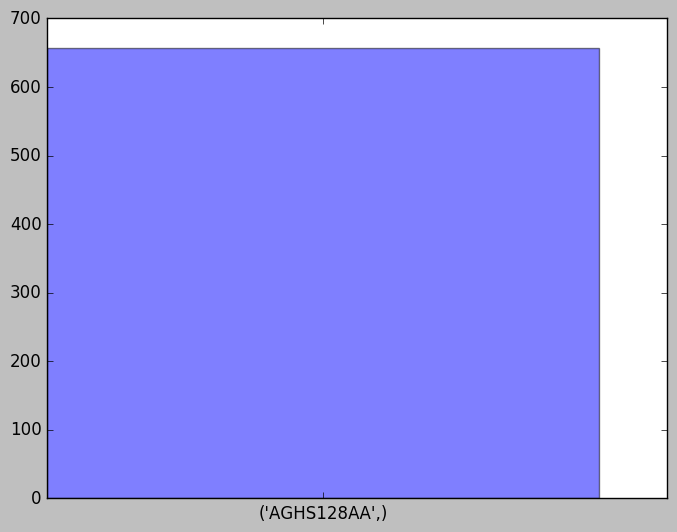

In [117]:
#import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import itertools 

ghits = [{'id': k, 'value': len(list(g))} for k, g in itertools.groupby(hits, lambda h: h['officeId'])]
objects = list(map(lambda g: g['id'], ghits))
y_pos = np.arange(len(objects))
performance = list(map(lambda g: g['value'], ghits))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
#plt.title('Programming language usage')
 
plt.show()